In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from pydataset import data

In [5]:
# Acquire our iris df
iris = data('iris')

1. Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.
Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [6]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# Rename columns for ease of use
iris = iris.rename(columns={'Sepal.Length': 'sepal_length', 
                           'Sepal.Width': 'sepal_width', 
                           'Petal.Length': 'petal_length',
                           'Petal.Width': 'petal_width'})

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
# Need to split and scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
# Splitting
train_validate, test = train_test_split(iris, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [16]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [36]:
# Scaling
scaler = StandardScaler()

In [37]:
scale_features = [col for col in iris.columns if (iris[col].dtype != 'object')]

In [38]:
scale_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [39]:
scaler = scaler.fit(train[scale_features])

In [42]:
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

In [43]:
train_scaled[scale_features] = scaler.transform(train[scale_features])
validate_scaled[scale_features] = scaler.transform(validate[scale_features])
test_scaled[scale_features] = scaler.transform(test[scale_features])

In [44]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
57,0.566916,0.637838,0.523986,0.533041,versicolor
41,-1.041063,1.107823,-1.466046,-1.252484,setosa
71,0.072153,0.402845,0.582516,0.807738,versicolor
24,-0.917373,0.637838,-1.231924,-0.977788,setosa
140,1.309060,0.167852,0.933698,1.219782,virginica


In [45]:
from sklearn.cluster import KMeans

In [46]:
# Feature selections
col1 = ['sepal_length', 'petal_length']
col2 = ['sepal_width', 'petal_width']
col3 = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 

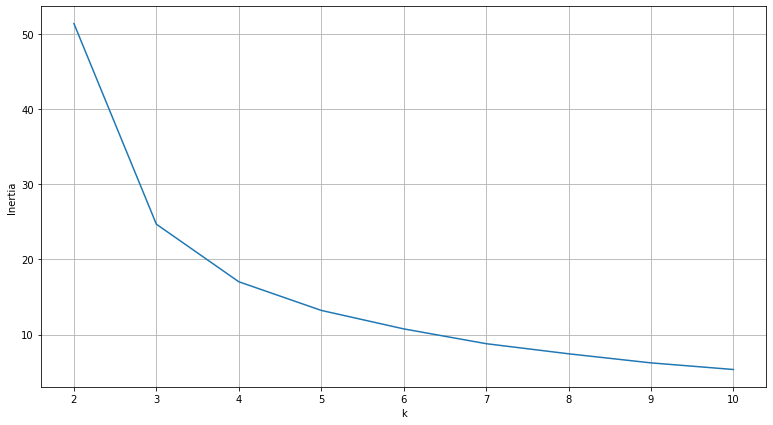

In [47]:
# Elbow method for best k value for each of our feature groups

X = train_scaled[col1]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

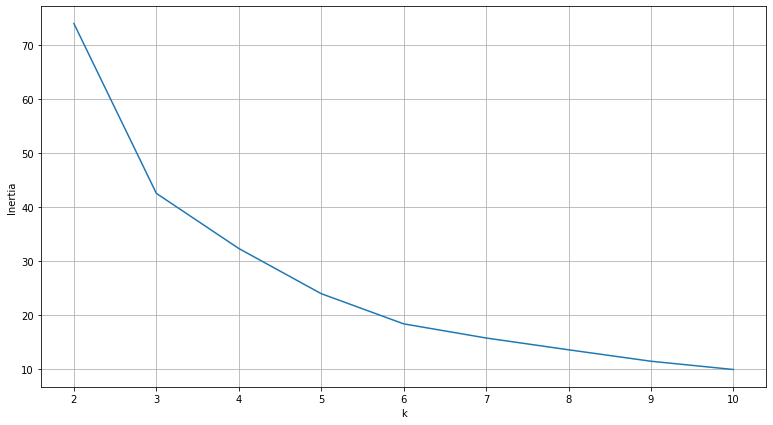

In [50]:
X = train_scaled[col2]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

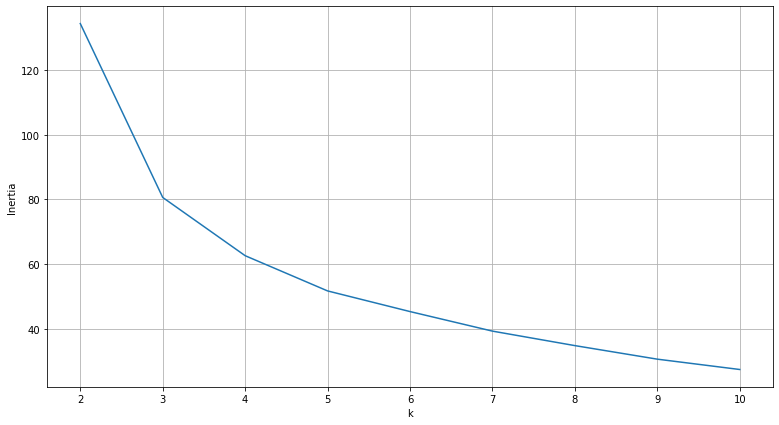

In [51]:
X = train_scaled[col3]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

k of 3 is most appropriate for all three feature selections

In [82]:
x = train_scaled[col1]
kmeans = KMeans(n_clusters=3).fit(x)

In [83]:
train_scaled['cluster'] = kmeans.predict(x)

In [84]:
train_scaled.cluster = train_scaled.cluster.astype('category')

In [85]:
train.head()
centroid1 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid1

,sepal_length,petal_length
0,1.344400,1.050759
1,-1.028268,-1.252107
2,0.046687,0.418976


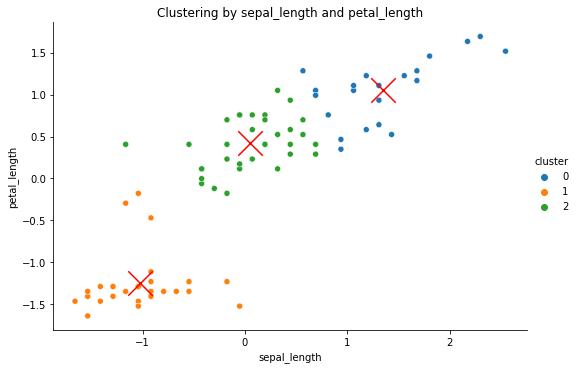

In [86]:
sns.relplot(data=train_scaled, x='sepal_length', y='petal_length', hue='cluster', aspect=1.5)
plt.title('Clustering by sepal_length and petal_length')
plt.scatter(centroid1.sepal_length, centroid1.petal_length, marker='x', s=600, c='red')

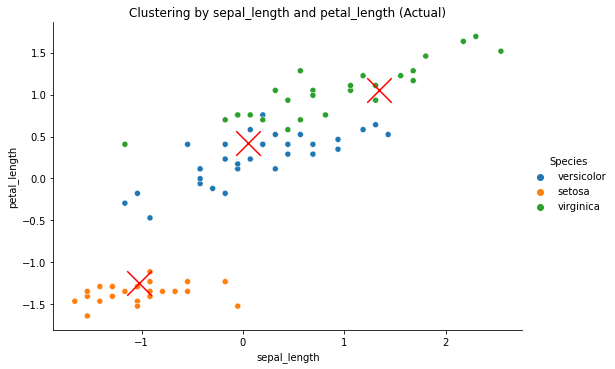

In [100]:
sns.relplot(data=train_scaled, x='sepal_length', y='petal_length', hue='Species', aspect=1.5)
plt.title('Clustering by sepal_length and petal_length (Actual)')
plt.scatter(centroid1.sepal_length, centroid1.petal_length, marker='x', s=600, c='red')

In [87]:
x = train_scaled[col2]
kmeans = KMeans(n_clusters=3).fit(x)
train_scaled['cluster2'] = kmeans.predict(x)
train_scaled.cluster2 = train_scaled.cluster2.astype('category')
centroid2 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid2

,sepal_width,petal_width
0,0.966828,-1.307423
1,-0.991951,0.178595
2,0.234993,0.969612


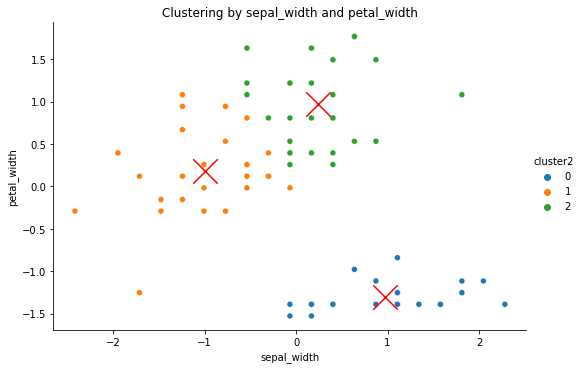

In [97]:

sns.relplot(data=train_scaled, x='sepal_width', y='petal_width', hue='cluster2', aspect=1.5)
plt.title('Clustering by sepal_width and petal_width')
plt.scatter(centroid2.sepal_width, centroid2.petal_width, marker='x', s=600, c='red')


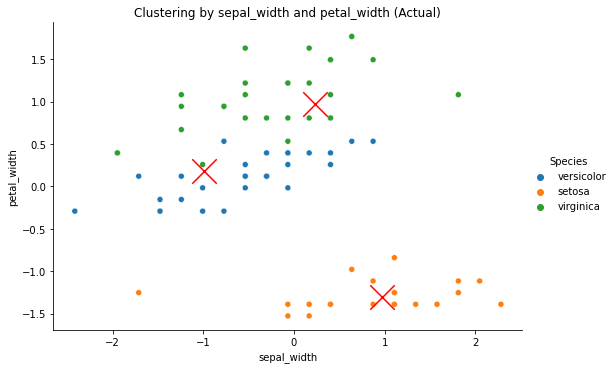

In [101]:

sns.relplot(data=train_scaled, x='sepal_width', y='petal_width', hue='Species', aspect=1.5)
plt.title('Clustering by sepal_width and petal_width (Actual)')
plt.scatter(centroid2.sepal_width, centroid2.petal_width, marker='x', s=600, c='red')

In [89]:
x = train_scaled[col3]
kmeans = KMeans(n_clusters=3).fit(x)
train_scaled['cluster3'] = kmeans.predict(x)
train_scaled.cluster3 = train_scaled.cluster3.astype('category')
centroid3 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid3

,sepal_length,sepal_width,petal_length,petal_width
0,-0.109518,-0.904303,0.326446,0.301266
1,-1.026791,0.863792,-1.360241,-1.305310
2,1.161582,0.249196,0.958461,0.934520


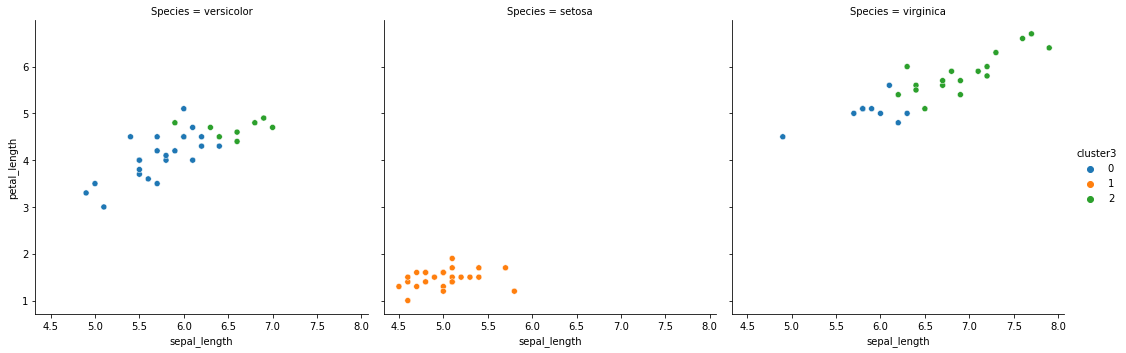

In [91]:
sns.relplot(data=train, x='sepal_length', y='petal_length', hue='cluster3', col='Species')

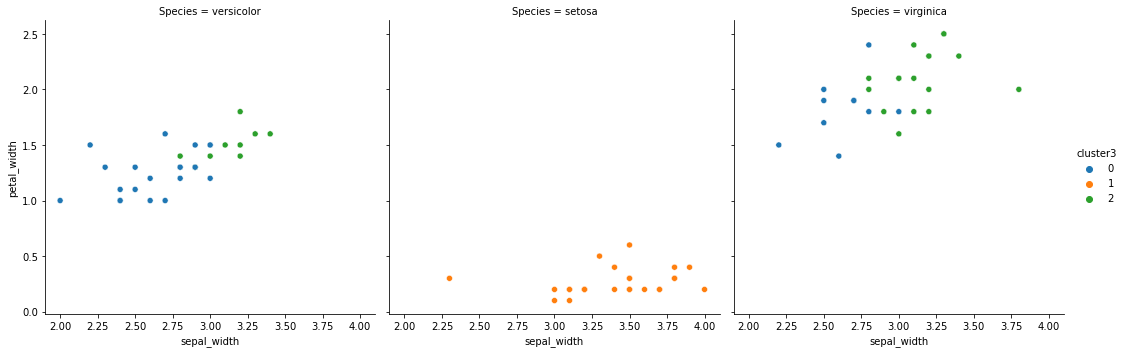

In [92]:
sns.relplot(data=train, x='sepal_width', y='petal_width', hue='cluster3', col='Species')

<AxesSubplot:xlabel='cluster3', ylabel='Species'>

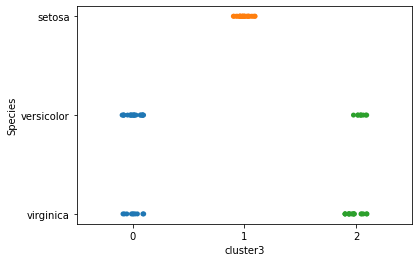

In [103]:
sns.stripplot(data=train, x='cluster3', y='Species')

<AxesSubplot:xlabel='cluster3', ylabel='count'>

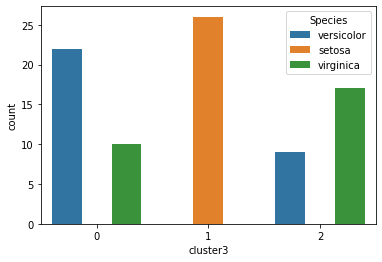

In [104]:
sns.countplot(data=train, x='cluster3', hue='Species')

In [71]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster,cluster2,cluster3
57,6.3,3.3,4.7,1.6,versicolor,1,0,2
41,5.0,3.5,1.3,0.3,setosa,2,1,1
71,5.9,3.2,4.8,1.8,versicolor,1,0,2
24,5.1,3.3,1.7,0.5,setosa,2,1,1
140,6.9,3.1,5.4,2.1,virginica,0,0,2


2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!